## Pix2Struct: Screenshot Parsing as Pretraining for Visual Language Understanding (2022-10-06) 
### What is Pix2Struct
Pix2Struct is an image-to-text model that reads screenshots/doc pages/plots and 

generates text answers or descriptions by rendering prompts on the image and decoding with a text decoder. 

It was introduced in the 2022 paper and has several task-specific checkpoints on Hugging Face (DocVQA, ChartQA, Screen2Words, etc.).

#### Tips for reliable CPU runs
-   Image prep: Use reasonably sized images (e.g., 1000–1600 px on the long side). Very large images slow CPU decoding.
-   Token budget: Keep max_new_tokens modest (32–96) for faster responses.
-   Batching: Stick to batch size 1 on CPU for live demos.
-   Reproducibility: Fix seeds if you want identical outputs each time (torch.manual_seed(0)), though generative decoding can still vary.
-   Speed-up (optional): Convert to OpenVINO with optimum-intel for a noticeable CPU boost; follow the official tutorial.

### Download and run Pix2Struct locally using CPU capacity
### Prereqs (CPU-only)
#### Create and activate a venv
-   py -3.10 -m venv .venv
-   .\.venv\Scripts\activate
#### Install deps (CPU)
-   pip install --upgrade pip
-   pip install "transformers>=4.40" pillow torch --index-url https://download.pytorch.org/whl/cpu

Why these? transformers includes the Pix2Struct classes & processor; Pillow loads images; CPU-only PyTorch wheel keeps it lightweight. Model docs & cards are here if you want to check: Hugging Face Pix2Struct docs and the task-specific model pages.

## Demo A — UI/Screenshot Captioning (Screen2Words)
#### UI/Screenshot Captioning
“Given a mobile app screenshot, the model summarizes screen contents (buttons, labels, layout).” (Demo A)

Talking point: Pix2Struct was pretrained by parsing masked webpage screenshots to simplified HTML, making it strong at UI/layout understanding.

#### New Arrivals Image 

In [3]:
import torch
from PIL import Image
from pathlib import Path
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
from IPython.display import display


# --- Parameters (edit these directly in the notebook) ---
model_id = "google/pix2struct-screen2words-base"
image_path = Path(r"C:\Users\PuttarajuS\new_arrivals.jpg")   # Replace with your image file path
prompt_text = "Describe the screenshot."  # You can change this prompt

# --- Load model & processor ---
processor = AutoProcessor.from_pretrained(model_id)
model = Pix2StructForConditionalGeneration.from_pretrained(model_id)

# Ensure model runs on CPU
model.eval()
torch.set_grad_enabled(False)

# --- Load and preprocess image ---
image = Image.open(image_path).convert("RGB")
inputs = processor(images=image, text=prompt_text, return_tensors="pt")

# --- Generate output ---
outputs = model.generate(**inputs, max_new_tokens=64)
caption = processor.batch_decode(outputs, skip_special_tokens=True)[0]

print("\nCaption:\n", caption.strip())

c:\Users\PuttarajuS\Desktop\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`



Caption:
 screen shows description of a movie


### Clark Website Screenshot

In [4]:
import torch
from PIL import Image
from pathlib import Path
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
from IPython.display import display


# --- Parameters (edit these directly in the notebook) ---
model_id = "google/pix2struct-screen2words-base"
image_path = Path(r"C:\Users\PuttarajuS\clark.png")   # Replace with your image file path
prompt_text = "Describe the screenshot."  # You can change this prompt

# --- Load model & processor ---
processor = AutoProcessor.from_pretrained(model_id)
model = Pix2StructForConditionalGeneration.from_pretrained(model_id)

# Ensure model runs on CPU
model.eval()
torch.set_grad_enabled(False)

# --- Load and preprocess image ---
image = Image.open(image_path).convert("RGB")
inputs = processor(images=image, text=prompt_text, return_tensors="pt")

# --- Generate output ---
outputs = model.generate(**inputs, max_new_tokens=64)
caption = processor.batch_decode(outputs, skip_special_tokens=True)[0]

print("\nCaption:\n", caption.strip())


Caption:
 page displaying a description about a university


## Demo B — Document VQA (ask a question about a page/diagram)
#### Document Q&A
“Ask targeted questions about a scanned form or PDF page image—totals, names, dates.” (Demo B)

Talking point: Use the DocVQA checkpoint rather than the generic base; Pix2Struct has multiple task-specific fine-tunes.

Great for “What’s the invoice total?”, “Who is the payee?”, “What is the chapter title?” etc.

In [6]:
import torch
from PIL import Image
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
from pathlib import Path

# Task-specific DocVQA checkpoint
model_id = "google/pix2struct-docvqa-base"

# ✅ Set your inputs here
image_path = Path(r"C:\Users\PuttarajuS\new_arrivals.jpg")  # adjust path
question   = "What is written on the left side of the page?"

# Load processor and model
processor = AutoProcessor.from_pretrained(model_id)
model = Pix2StructForConditionalGeneration.from_pretrained(model_id)

model.eval()
torch.set_grad_enabled(False)

# Open and prepare image
image = Image.open(image_path).convert("RGB")

# Pix2Struct renders the question onto the image internally
inputs = processor(images=image, text=question, return_tensors="pt")

# Generate answer
generated_ids = model.generate(**inputs, max_new_tokens=64)
answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Show Q & A
print(f"\nQ: {question}\nA: {answer.strip()}")


Q: What is written on the left side of the page?
A: Canva Sans


In [8]:
import torch
from PIL import Image
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
from pathlib import Path

# Task-specific DocVQA checkpoint
model_id = "google/pix2struct-docvqa-base"

# ✅ Set your inputs here
image_path = Path(r"C:\Users\PuttarajuS\clark.png")  # adjust path
question   = "Which university is this website about?"

# Load processor and model
processor = AutoProcessor.from_pretrained(model_id)
model = Pix2StructForConditionalGeneration.from_pretrained(model_id)

model.eval()
torch.set_grad_enabled(False)

# Open and prepare image
image = Image.open(image_path).convert("RGB")

# Pix2Struct renders the question onto the image internally
inputs = processor(images=image, text=question, return_tensors="pt")

# Generate answer
generated_ids = model.generate(**inputs, max_new_tokens=64)
answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Show Q & A
print(f"\nQ: {question}\nA: {answer.strip()}")


Q: Which university is this website about?
A: Clark University


### Demo C — Chart QA (DePlot, built on Pix2Struct)
For plots/graphs (line/bar/scatter), “What is the value in 2019?”, “Which category is highest?” DePlot is a Pix2Struct-based model tuned for charts.
#### Chart/Plot Q&A
“Ask for values, trends, maxima/minima from charts.” (Demo C via DePlot built on Pix2Struct).

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


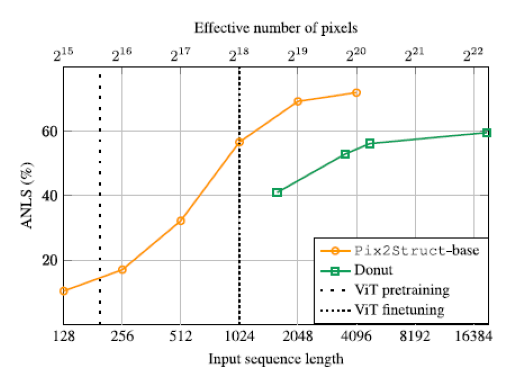


Q: What is the ANLS(%) at Input Sequence 1024?
A: TITLE | Effective number of pixels<0x0A>Input sequence length | Pi x2Struct–base | Donut | ViT pretraining | ViT finetuning<0x0A>128 | 10.88 | 2.16 | 2.16 | 2.16<0x0A>256 | 17.03 | 2.16


In [9]:
import torch
from PIL import Image
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
from pathlib import Path
import matplotlib.pyplot as plt

# Model ID for DePlot (chart QA)
model_id = "google/deplot"

# ✅ Set your inputs here
image_path = Path(r"C:\Users\PuttarajuS\Pix2Struct.png")  # change path
question   = "What is the ANLS(%) at Input Sequence 1024?"

# Load processor and model
processor = AutoProcessor.from_pretrained(model_id)
model = Pix2StructForConditionalGeneration.from_pretrained(model_id)

model.eval()
torch.set_grad_enabled(False)

# Open and show image inline
image = Image.open(image_path).convert("RGB")
plt.imshow(image)
plt.axis("off")
plt.show()

# Prepare inputs (Pix2Struct overlays the question internally)
inputs = processor(images=image, text=question, return_tensors="pt")

# Generate the answer
ids = model.generate(**inputs, max_new_tokens=80)
answer = processor.batch_decode(ids, skip_special_tokens=True)[0]

# Show result
print(f"\nQ: {question}\nA: {answer.strip()}")

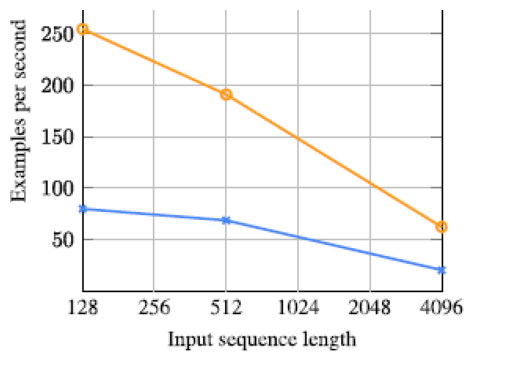


Q: For the Input sequence length 1024, how many examples per second is shown on the chart?
A: TITLE |  <0x0A> Input sequence length | Examples per second <0x0A> 128 | 253 <0x0A> 256 | 222 <0x0A> 512 | 190 <0x0A> 1024 | 148 <0x0A> 2048 | 104 <0x0A> 4096 | 62


In [10]:
import torch
from PIL import Image
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
from pathlib import Path
import matplotlib.pyplot as plt

# Model ID for DePlot (chart QA)
model_id = "google/deplot"

# ✅ Set your inputs here
image_path = Path(r"C:\Users\PuttarajuS\Pix2Struct1.png")  # change path
question   = "For the Input sequence length 1024, how many examples per second is shown on the chart?"

# Load processor and model
processor = AutoProcessor.from_pretrained(model_id)
model = Pix2StructForConditionalGeneration.from_pretrained(model_id)

model.eval()
torch.set_grad_enabled(False)

# Open and show image inline
image = Image.open(image_path).convert("RGB")
plt.imshow(image)
plt.axis("off")
plt.show()

# Prepare inputs (Pix2Struct overlays the question internally)
inputs = processor(images=image, text=question, return_tensors="pt")

# Generate the answer
ids = model.generate(**inputs, max_new_tokens=80)
answer = processor.batch_decode(ids, skip_special_tokens=True)[0]

# Show result
print(f"\nQ: {question}\nA: {answer.strip()}")